<a href="https://colab.research.google.com/github/aisyahaini/data-mining/blob/main/Bismillah_cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import Library yang akan digunakan
#%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from scipy.spatial.distance import cdist
import pandas as pd
import numpy as np
from sklearn.metrics import silhouette_score

In [ ]:
nama_file = 'dataset-spx.csv'

# Membaca dataset dari file CSV
dataset = pd.read_csv(nama_file)

# Menampilkan dataset
print("Tampilan Dataset:")
print(dataset)

Tampilan Dataset:
          NO           Order ID SLS Tracking Number Shopee Order SN  \
0        1.0  SPXID032015195479     ID236667315799U  230917K79M0Q64   
1        2.0  SPXID033602126129     ID236419651756N  230917K3CWWN5G   
2        3.0  SPXID037690024299     ID234263932872R  230918KED69GX0   
3        4.0  SPXID030354703119     ID2376474881652  230918KEWX9HM6   
4        5.0  SPXID030004779359     ID2325758529033  230918KDCRPG7B   
...      ...                ...                 ...             ...   
996    997.0  SPXID035961535639     ID239754936468K  230917K39H4318   
997    998.0  SPXID037787129629     ID2329712385768  230917K3G6TGM2   
998    999.0  SPXID037669724559     ID2307166350718  230917J1C94NVF   
999   1000.0  SPXID035191593259     ID2309643931834  230917KAP5AQYK   
1000     NaN                NaN                 NaN             NaN   

     Sort Code Name    SOC Received time OnHoldReason              Status  \
0         PARIANGAN  2023-09-19 22:38:36       Norma

In [ ]:
# Menghapus kolom tertentu
kolom_yang_dihapus = ['NO', 'Order ID', 'SLS Tracking Number', 'Shopee Order SN',
                      'Sort Code Name', 'SOC Received time', 'OnHoldReason',
                      'Original ASF', 'Rounding ASF', 'Pickup Station',
                      'Destination Station', 'Next Station', 'Current Station', 'Channel']
dataset = dataset.drop(columns=kolom_yang_dihapus)

# Menampilkan dataset setelah penghapusan kolom
print("\nDataset Setelah Penghapusan Kolom:")
print(dataset)

# Menyimpan dataset yang telah diubah ke file CSV baru
dataset.to_csv('dataset-baru.csv', index=False)


Dataset Setelah Penghapusan Kolom:
                  Status                 Order Account Payment Method
0             SOC_Packed  Economy Marketplace Delivery            COD
1     SOC_LHTransporting  Economy Marketplace Delivery            COD
2     SOC_LHTransporting  Economy Marketplace Delivery            COD
3     SOC_LHTransporting  Economy Marketplace Delivery        NON-COD
4     SOC_LHTransporting      SPX Standard Marketplace        NON-COD
...                  ...                           ...            ...
996         SOC_Received  Economy Marketplace Delivery            COD
997         SOC_Received  Economy Marketplace Delivery            COD
998   SOC_LHTransporting      SPX Standard Marketplace            COD
999    SOC_LHTransported      SPX Standard Marketplace        NON-COD
1000                 NaN                           NaN            NaN

[1001 rows x 3 columns]


In [ ]:
# Menampilkan dataset sebelum penghapusan baris terakhir
print("Dataset Sebelum Penghapusan Baris Terakhir:")
print(dataset)

# Menghapus baris terakhir
dataset = dataset.drop(dataset.index[-1])

# Menampilkan dataset setelah penghapusan baris terakhir
print("\nDataset Setelah Penghapusan Baris Terakhir:")
print(dataset)

# Menyimpan dataset yang telah diubah ke file CSV baru
dataset.to_csv('dataset-fix.csv', index=False)

Dataset Sebelum Penghapusan Baris Terakhir:
                  Status                 Order Account Payment Method
0             SOC_Packed  Economy Marketplace Delivery            COD
1     SOC_LHTransporting  Economy Marketplace Delivery            COD
2     SOC_LHTransporting  Economy Marketplace Delivery            COD
3     SOC_LHTransporting  Economy Marketplace Delivery        NON-COD
4     SOC_LHTransporting      SPX Standard Marketplace        NON-COD
...                  ...                           ...            ...
996         SOC_Received  Economy Marketplace Delivery            COD
997         SOC_Received  Economy Marketplace Delivery            COD
998   SOC_LHTransporting      SPX Standard Marketplace            COD
999    SOC_LHTransported      SPX Standard Marketplace        NON-COD
1000                 NaN                           NaN            NaN

[1001 rows x 3 columns]

Dataset Setelah Penghapusan Baris Terakhir:
                 Status                 Order 

In [ ]:
import pandas as pd

# Nama file CSV yang akan dibaca
nama_file = 'dataset-fix.csv'

# Membaca dataset dari file CSV
dataset = pd.read_csv(nama_file)

# Menampilkan dataset sebelum perubahan tipe data
print("Dataset Sebelum Perubahan Tipe Data:")
print(dataset)

# Membuat peta penggantian untuk setiap kolom
peta_penggantian_status = {'SOC_Packed': 1, 'SOC_LHTransporting': 2, 'SOC_Received': 3,
                           'SOC_LHTransported': 4, 'SOC_LHPacking' : 5}
peta_penggantian_orderA = {'SPX Standard Marketplace': 1, 'Economy Marketplace Delivery': 2,
                           'Marketplace Collection': 3}
peta_penggantian_payment = {'NON-COD': 1, 'COD': 2}

# Mengganti nilai dalam kolom menggunakan peta penggantian
dataset['Status'] = dataset['Status'].map(peta_penggantian_status)
dataset['Order Account'] = dataset['Order Account'].map(peta_penggantian_orderA)
dataset['Payment Method'] = dataset['Payment Method'].map(peta_penggantian_payment)

# Menampilkan dataset setelah perubahan tipe data
print("\nDataset Setelah Perubahan Tipe Data:")
print(dataset)

# Menyimpan dataset yang telah diubah ke file CSV baru
dataset.to_csv('dataset-clear-fix.csv', index=False)


Dataset Sebelum Perubahan Tipe Data:
                 Status                 Order Account Payment Method
0            SOC_Packed  Economy Marketplace Delivery            COD
1    SOC_LHTransporting  Economy Marketplace Delivery            COD
2    SOC_LHTransporting  Economy Marketplace Delivery            COD
3    SOC_LHTransporting  Economy Marketplace Delivery        NON-COD
4    SOC_LHTransporting      SPX Standard Marketplace        NON-COD
..                  ...                           ...            ...
995   SOC_LHTransported  Economy Marketplace Delivery        NON-COD
996        SOC_Received  Economy Marketplace Delivery            COD
997        SOC_Received  Economy Marketplace Delivery            COD
998  SOC_LHTransporting      SPX Standard Marketplace            COD
999   SOC_LHTransported      SPX Standard Marketplace        NON-COD

[1000 rows x 3 columns]

Dataset Setelah Perubahan Tipe Data:
     Status  Order Account  Payment Method
0         1              2   

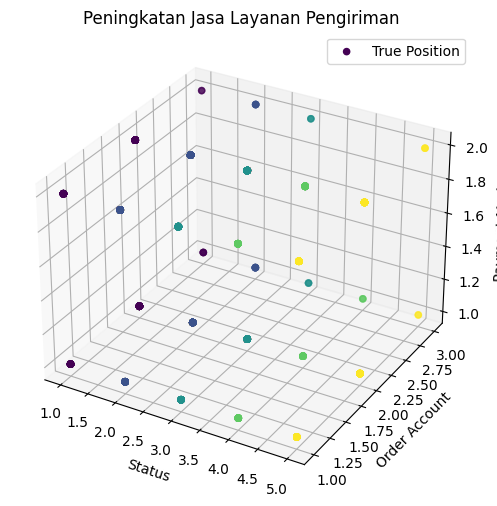

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Read the data from a CSV file
file_path = 'dataset-clear-fix.csv'  # replace with the actual file path
df = pd.read_csv(file_path)

# Membuat scatter plot 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Menggunakan kolom "Status", "Order Account", dan "Payment Method"
# Assign different colors based on the 'Status' column
scatter = ax.scatter(
    df['Status'],
    df['Order Account'],
    df['Payment Method'],
    c=df['Status'],
    cmap='viridis',
    label='True Position'
)

# Menambahkan label pada sumbu
ax.set_xlabel("Status")
ax.set_ylabel("Order Account")
ax.set_zlabel("Payment Method")

# Menampilkan legenda
ax.legend()

# Menampilkan grafik
plt.title("Peningkatan Jasa Layanan Pengiriman")
plt.show()

Pilih indeks kolom untuk sumbu x (['Status', 'Order Account', 'Payment Method']): 2
Pilih indeks kolom untuk sumbu y (['Status', 'Order Account', 'Payment Method']): 1


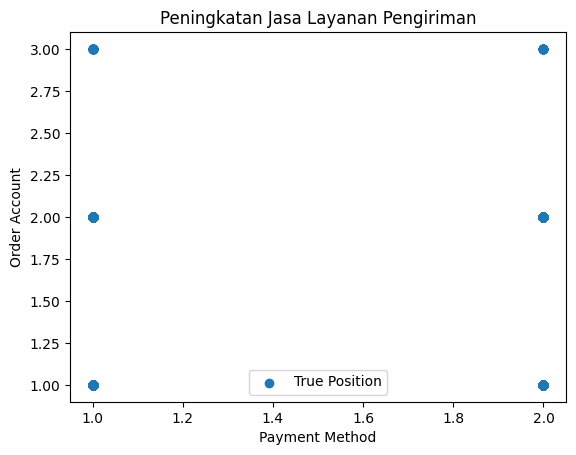

In [ ]:
file_path = 'dataset-clear-fix.csv'  # replace with the actual file path
df = pd.read_csv(file_path)

# Membuat daftar nama kolom
column_names = df.columns.tolist()

# Meminta input dari pengguna untuk memilih kolom
selected_column_x = int(input(f"Pilih indeks kolom untuk sumbu x ({column_names}): "))
selected_column_y = int(input(f"Pilih indeks kolom untuk sumbu y ({column_names}): "))

# Membuat scatter plot berdasarkan pilihan pengguna
plt.scatter(df.iloc[:, selected_column_x], df.iloc[:, selected_column_y], label='True Position')
plt.xlabel(column_names[selected_column_x])
plt.ylabel(column_names[selected_column_y])
plt.title("Peningkatan Jasa Layanan Pengiriman")
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

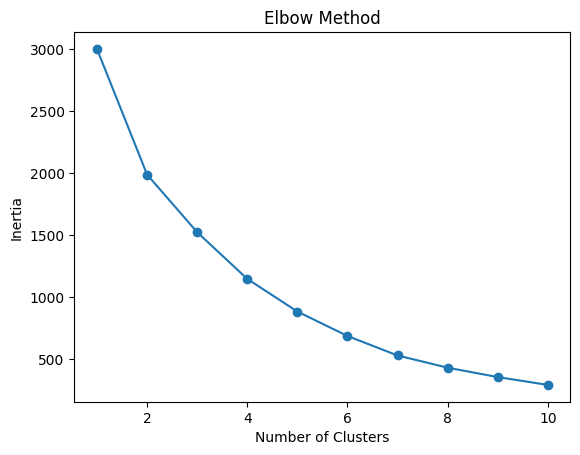

Jumlah klaster optimal (k) berdasarkan elbow method: 2


In [ ]:
# Read the data from a CSV file
file_path = 'dataset-clear-fix.csv'  # replace with the actual file path
df = pd.read_csv(file_path)

# Normalisasi data jika diperlukan
scaler = preprocessing.StandardScaler()
df_scaled = scaler.fit_transform(df)

# Mencari nilai inersia untuk jumlah klaster 1 hingga n (misalnya, 10)
inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot elbow method
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Menentukan jumlah klaster optimal berdasarkan elbow method
elbow_index = 0
for i in range(1, len(inertia) - 1):
    if (inertia[i] - inertia[i + 1]) / (inertia[i - 1] - inertia[i]) < 0.5:
        elbow_index = i
        break

optimal_k = elbow_index + 1
print(f"Jumlah klaster optimal (k) berdasarkan elbow method: {optimal_k}")

In [ ]:
#Menampilkan nilai Centroid yang digenerate oleh algoritma
print(kmeans.cluster_centers_)

[[-0.01710553  0.11455012 -1.03667198]
 [ 0.01591673 -0.10658911  0.96462528]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Hasil Klastering:
     Status  Order Account  Payment Method  Cluster
0         1              2               2        1
1         2              2               2        1
2         2              2               2        1
3         2              2               1        0
4         2              1               1        0
..      ...            ...             ...      ...
995       4              2               1        0
996       3              2               2        1
997       3              2               2        1
998       2              1               2        1
999       4              1               1        0

[1000 rows x 4 columns]


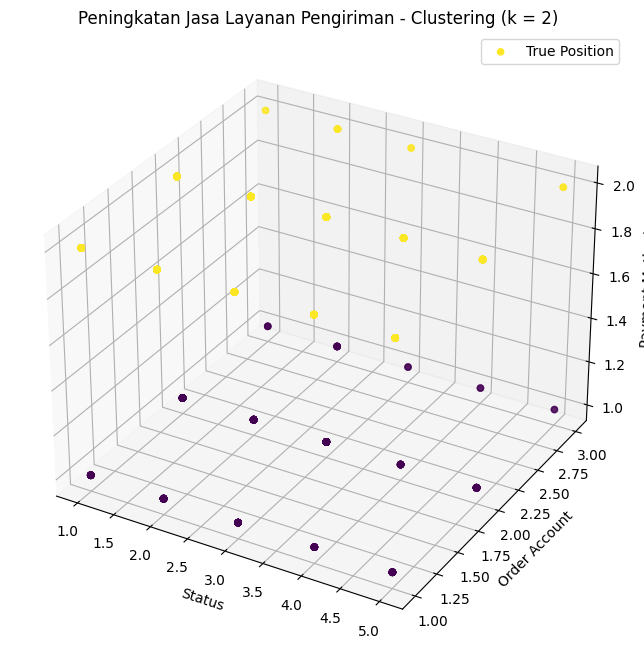

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing
from mpl_toolkits.mplot3d import Axes3D

# Read the data from a CSV file
file_path = 'dataset-clear-fix.csv'  # replace with the actual file path
df = pd.read_csv(file_path)

# Normalisasi data jika diperlukan
scaler = preprocessing.StandardScaler()
df_scaled = scaler.fit_transform(df)

# Menentukan jumlah klaster optimal berdasarkan elbow method
optimal_k = 2  # Ganti dengan nilai optimal yang telah Anda tentukan atau hitung

# Melakukan klastering menggunakan K-Means dengan jumlah klaster optimal
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Menampilkan hasil klastering
print("Hasil Klastering:")
print(df[['Status', 'Order Account', 'Payment Method', 'Cluster']])

# Membuat scatter plot 3D untuk menampilkan klaster
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot untuk titik klaster
scatter = ax.scatter(df['Status'], df['Order Account'], df['Payment Method'], c=df['Cluster'], cmap='viridis', label='True Position')

ax.set_xlabel("Status")
ax.set_ylabel("Order Account")
ax.set_zlabel("Payment Method")
ax.set_title(f"Peningkatan Jasa Layanan Pengiriman - Clustering (k = {optimal_k})")
ax.legend()

plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


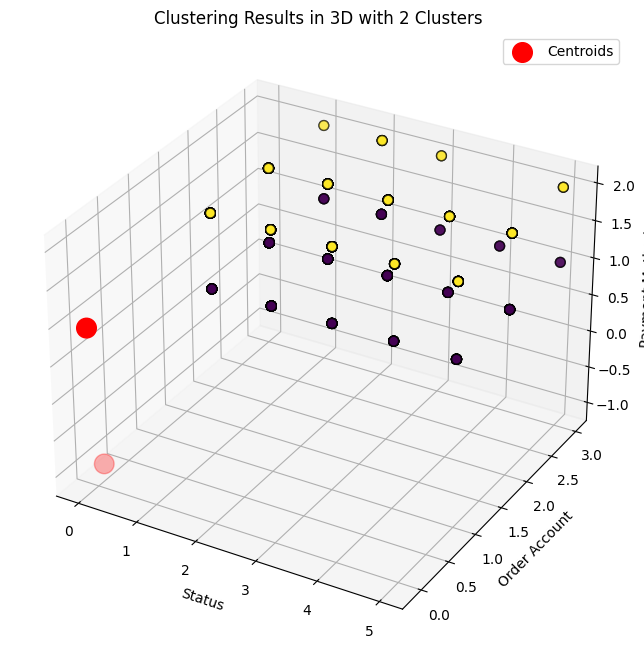

In [ ]:
# Melakukan klastering menggunakan K-Means dengan jumlah klaster optimal
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(df_scaled)

# Menambahkan kolom Cluster ke DataFrame
df['Cluster'] = cluster_labels

# Menampilkan plot hasil klaster dalam tiga dimensi
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot untuk titik klaster
scatter = ax.scatter(df['Status'], df['Order Account'], df['Payment Method'], c=cluster_labels, cmap='viridis', edgecolor='k', s=50)
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], c='red', marker='o', s=200, label='Centroids')

ax.set_xlabel('Status')
ax.set_ylabel('Order Account')
ax.set_zlabel('Payment Method')
ax.set_title(f'Clustering Results in 3D with {optimal_k} Clusters')
ax.legend()

plt.show()

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.metrics import silhouette_score

# Read the data from a CSV file
file_path = 'dataset-clear-fix.csv'  # replace with the actual file path
df = pd.read_csv(file_path)

# Normalisasi data jika diperlukan
scaler = preprocessing.StandardScaler()
df_scaled = scaler.fit_transform(df)

# Mencari nilai inersia untuk jumlah klaster 1 hingga n (misalnya, 10)
inertia = []
silhouette_scores = []

for n in range(2, 11):  # Minimum jumlah klaster adalah 2
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(df_scaled)
    cluster_labels = kmeans.predict(df_scaled)

    # Menghitung Silhouette Index
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

    inertia.append(kmeans.inertia_)

# Menentukan jumlah klaster optimal berdasarkan elbow method
elbow_index = 0
for i in range(1, len(inertia) - 1):
    if (inertia[i] - inertia[i + 1]) / (inertia[i - 1] - inertia[i]) < 0.5:
        elbow_index = i
        break

optimal_k = elbow_index + 2  # Ditambah 2 karena dimulai dari n=2
#print(f"Jumlah klaster optimal (k) berdasarkan elbow method: {optimal_k}")

# Menampilkan nilai Silhouette Index untuk jumlah klaster optimal
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels_optimal = kmeans_optimal.fit_predict(df_scaled)
silhouette_avg_optimal = silhouette_score(df_scaled, cluster_labels_optimal)

print(f' Silhouette Index: {silhouette_avg_optimal}')


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

 Silhouette Index: 0.3790023921002596


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Calculate silhouette scores
silhouette_scores = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels = kmeans.fit_predict(X_normalized)
    unique_labels = np.unique(labels)
    if len(unique_labels) > 1:
        silhouette_avg = silhouette_score(X_normalized, labels)
        silhouette_scores.append(silhouette_avg)
    else:
        silhouette_scores.append(np.nan)  # Menambahkan nilai NaN jika hanya ada satu klaster

# Plot silhouette scores
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score to Find Optimal k')
plt.show()

NameError: ignored